In [1]:
%matplotlib inline
from random import normalvariate

In [2]:
num_iterations = 10000

In [3]:
def generator() -> int:
    return normalvariate(0, 3)

In [4]:
X = [0]
for t in range (1, num_iterations):
    X.append(generator())

In [13]:
import csv
from datetime import datetime
filename=f'../datasets/wn_{datetime.utcnow()}.csv'
with open(filename, 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)
filename

'../datasets/wn_2019-09-13 18:28:54.450032.csv'

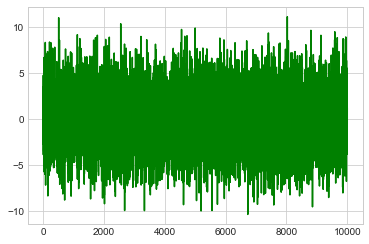

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [15]:
import numpy as np
ts = np.array(X)

In [16]:
ts.mean()

-0.007452956921380438

In [17]:
ts.std()

3.0173639824853034

In [18]:
from math import ceil, floor
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-floor(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

In [19]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = -0.5055191406672905 sigma=9.850271633853406


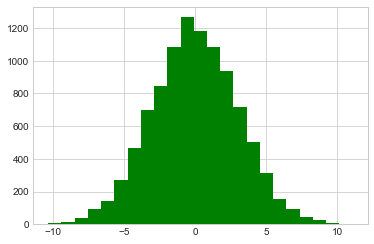

In [20]:
count, bins, ignored  = plt.hist(X, int(ceil(max(ts))-floor(min(ts))), color='green')